In [1]:
import sys
sys.path.append('C:/Users/Brendon/Documents/PythonScripts/Jupyter/Research/Statistics/code')

from statfunctions import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')
from scipy.special import erf

from sympy import symbols, exp
from sympy import init_printing
init_printing(use_latex=True) 

import pandas as pd

In [2]:
# create model function
x, a, x0, s, c = symbols('x a x0 s c')
variables  = (x, a, x0, s, c)
expression = a * exp(-(x - x0)**2 / (2 * s**2)) + c

# create artificial data
N  = 75
X  = np.linspace(-5,5,N)
Y  = [np.exp(-X**2/2.0), (2.0) * np.exp(-(X - 1)**2/.5)]
X  = [X] * 2
dY = [.3 * Y[i] + .1 for i in range(len(Y))] 
Y  = [Y[i] + dY[i] * np.random.normal(size=(N,)) + .2 * i for i in range(len(X))]

# perform linear regression via two methods
regrs = [NonLinearFit1D(X[0],Y[0],dY[0], 
                        variables=variables, expression=expression,
                        label='generic non-linear fit'),
         GaussianFit1D(X[1], Y[1], dY[1], offset=True, start_point=[1, 1, 1, 1],
                        label='gaussian fit')]

print regrs[0]
print regrs[1]

ValueError: arrays must all be same length

In [10]:
regr.evaluate_x_functions(regr.data.x).shape

(75,)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


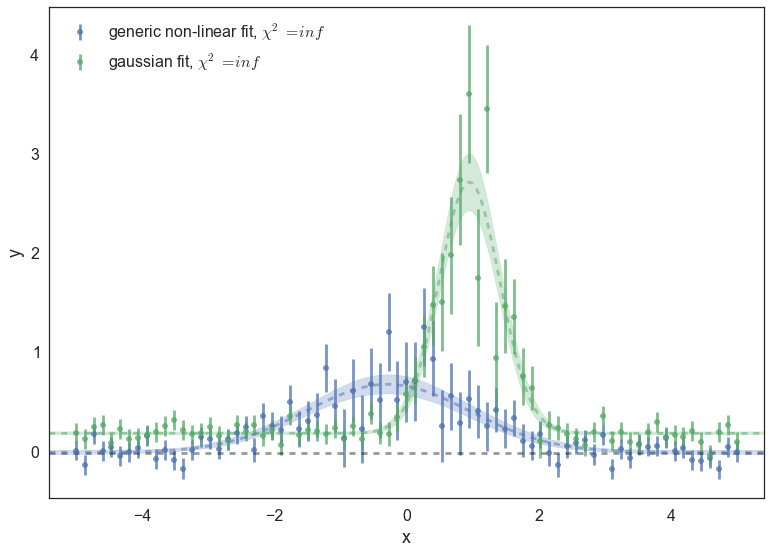

In [3]:
regression_plot(regrs, legend=True)